In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
path = r'../output/amazon/' # use your path
all_files = [x for x in os.listdir(path) if x.endswith(".csv")]
li = []

for filename in all_files:
    df = pd.read_csv(path+filename, index_col=None, header=0)
    df["Brand"] = filename.split("_")[0]
    df["Line"] = filename.split("_")[1].split(".")[0]
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
df

,Product,Rating,Title,Review,Brand,Line
0,Maui Moisture Frizz-Free + Shea Butter Leave-i...,2.0 out of 5 stars,UGHHh,I had high hopes for this after seeing reviews...,Maui Moisture,All Products
1,Maui Moisture Frizz-Free + Shea Butter Leave-i...,3.0 out of 5 stars,Just okay,I've been making a point of buying only parabe...,Maui Moisture,All Products
2,Maui Moisture Frizz-Free + Shea Butter Leave-i...,5.0 out of 5 stars,Literally my favorite brand,I cannot emphasize enough how amazing this bra...,Maui Moisture,All Products
3,Maui Moisture Frizz-Free + Shea Butter Leave-i...,VINE VOICE,5.0 out of 5 stars,I found this shampoo and conditioner by chance...,Maui Moisture,All Products
4,Maui Moisture Frizz-Free + Shea Butter Leave-i...,5.0 out of 5 stars,HOLY GRAIL - Low porosity hair life saver!!!!,I've tried so many products from Olaplex to ev...,Maui Moisture,All Products
...,...,...,...,...,...,...
60819,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,Like sand & silk: perfect soak,I ordered this and another scent based on the ...,SheaMoisture,Coconut and Hibiscus
60820,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,Great Product!,I got this as a gift for my Bachelorette Party...,SheaMoisture,Coconut and Hibiscus
60821,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,4.0 out of 5 stars,Four Stars,Lovely fragrance!,SheaMoisture,Coconut and Hibiscus
60822,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,Verified Purchase,Report abuse,The product arrived on time and as advertised....,SheaMoisture,Coconut and Hibiscus


In [5]:
df = df[df.Rating.str.contains("stars")]
df["RatingNumeric"]  = df.Rating.str.split(expand=True)[0]
df["Title"] = df["Title"].str.lower()
df["Review"] = df["Review"].str.lower()

<ipython-input-5-3d6003429c89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RatingNumeric"]  = df.Rating.str.split(expand=True)[0]
<ipython-input-5-3d6003429c89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"] = df["Title"].str.lower()
<ipython-input-5-3d6003429c89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [6]:
df

,Product,Rating,Title,Review,Brand,Line,RatingNumeric
0,Maui Moisture Frizz-Free + Shea Butter Leave-i...,2.0 out of 5 stars,ughhh,i had high hopes for this after seeing reviews...,Maui Moisture,All Products,2.0
1,Maui Moisture Frizz-Free + Shea Butter Leave-i...,3.0 out of 5 stars,just okay,i've been making a point of buying only parabe...,Maui Moisture,All Products,3.0
2,Maui Moisture Frizz-Free + Shea Butter Leave-i...,5.0 out of 5 stars,literally my favorite brand,i cannot emphasize enough how amazing this bra...,Maui Moisture,All Products,5.0
4,Maui Moisture Frizz-Free + Shea Butter Leave-i...,5.0 out of 5 stars,holy grail - low porosity hair life saver!!!!,i've tried so many products from olaplex to ev...,Maui Moisture,All Products,5.0
5,Maui Moisture Frizz-Free + Shea Butter Leave-i...,1.0 out of 5 stars,awful and doesn’t condition the hair at all,this is the worst waste of money. it is worse ...,Maui Moisture,All Products,1.0
...,...,...,...,...,...,...,...
60817,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,very nice relaxing product,arrived on time. very nice relaxing product.,SheaMoisture,Coconut and Hibiscus,5.0
60818,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,five stars,"wonderful product, love it!",SheaMoisture,Coconut and Hibiscus,5.0
60819,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,like sand & silk: perfect soak,i ordered this and another scent based on the ...,SheaMoisture,Coconut and Hibiscus,5.0
60820,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,great product!,i got this as a gift for my bachelorette party...,SheaMoisture,Coconut and Hibiscus,5.0


In [7]:
brands = list(df.Brand.unique())
brands

['Maui Moisture',
 "Carol's Daughter",
 "Not Your Mother's",
 "Uncle Funky's Daughter",
 'SheaMoisture',
 'Moptop',
 'Giovanni',
 'Pacifica',
 'Cake Beauty',
 'TRESemme',
 'Curls']

In [8]:
brand_counts = df.Brand.value_counts()
brand_counts

Carol's Daughter          18694
SheaMoisture              12437
Moptop                     8545
Giovanni                   3447
Maui Moisture              3053
Pacifica                   2820
Curls                      1992
Cake Beauty                1739
Uncle Funky's Daughter     1336
Not Your Mother's          1112
TRESemme                    580
Name: Brand, dtype: int64

In [9]:
def plot_rating_keyword(keyword):
    filtered_df = df[(df.Title.str.contains(keyword) | (df.Review.str.contains(keyword)))]

    cts = filtered_df[['Brand','RatingNumeric']].value_counts()
    brand_cts = filtered_df.Brand.value_counts()

    star1 = [cts[b,'1.0']/brand_cts[b] if any(cts.index.isin([(b,'1.0')])) else 0 for b in brands]
    star2 = [cts[b,'2.0']/brand_cts[b] if any(cts.index.isin([(b,'2.0')])) else 0 for b in brands]
    star3 = [cts[b,'3.0']/brand_cts[b] if any(cts.index.isin([(b,'3.0')])) else 0 for b in brands]
    star4 = [cts[b,'4.0']/brand_cts[b] if any(cts.index.isin([(b,'4.0')])) else 0 for b in brands]
    star5 = [cts[b,'5.0']/brand_cts[b] if any(cts.index.isin([(b,'5.0')])) else 0 for b in brands]

    x = pd.DataFrame([star1,star2,star3,star4,star5], columns=brands).transpose()
    x.columns = ['1.0','2.0','3.0', '4.0', '5.0']
    x.plot(kind='bar', stacked=True,
            title='Ratings by keyword: ' + keyword)


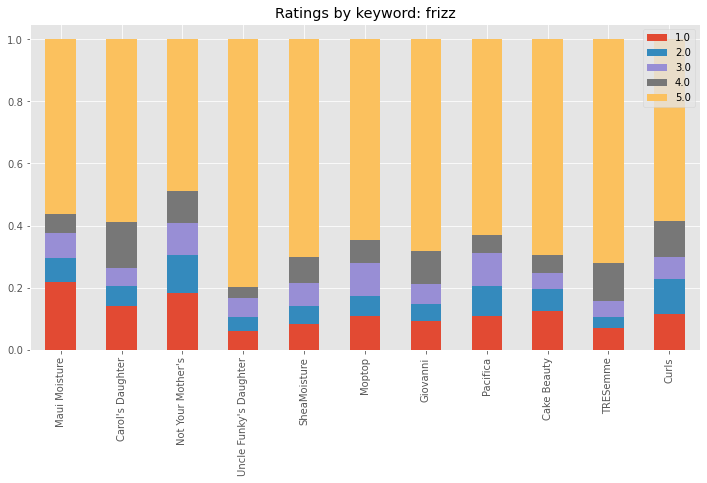

In [10]:
plot_rating_keyword("frizz")

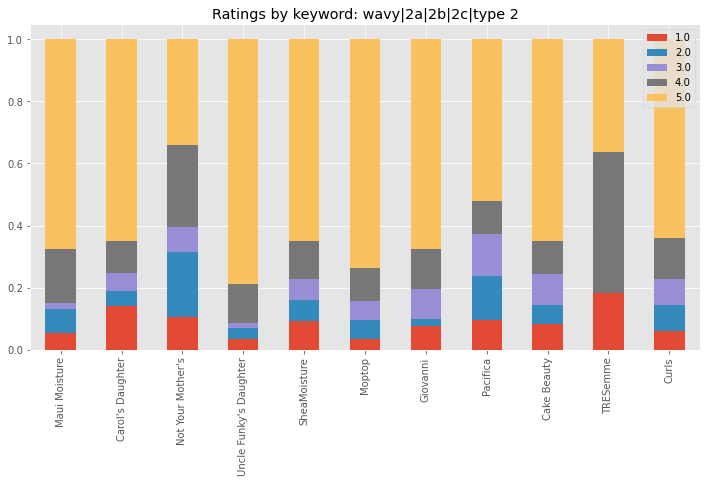

In [11]:
plot_rating_keyword("wavy|2a|2b|2c|type 2")

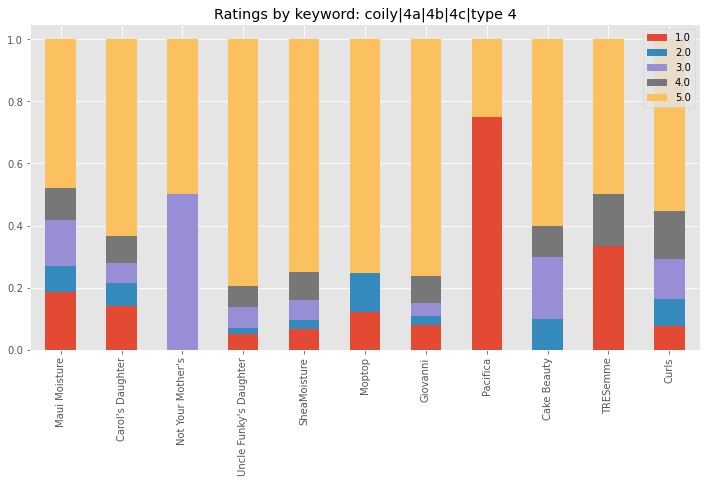

In [12]:
plot_rating_keyword("coily|4a|4b|4c|type 4")

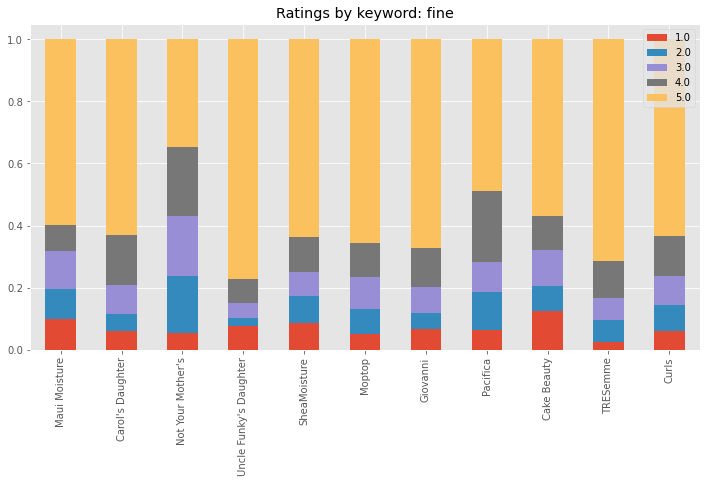

In [13]:
plot_rating_keyword("fine")

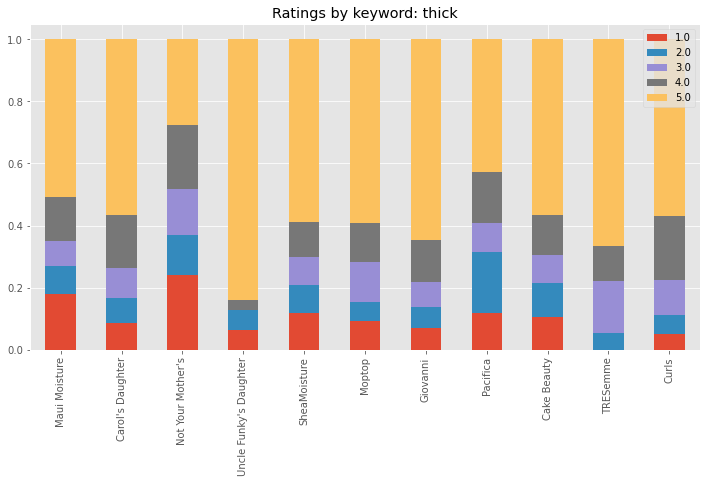

In [14]:
plot_rating_keyword("thick")